In [1]:
import pandas as pd
import numpy as np

In [63]:
user_info = pd.read_csv('data/jdata_user_basic_info.csv')
sku_info = pd.read_csv('data/jdata_sku_basic_info.csv')
user_action = pd.read_csv('data/jdata_user_action.csv', parse_dates=['a_date'])
user_order = pd.read_csv('data/jdata_user_order.csv', parse_dates=['o_date'])
user_comment = pd.read_csv('data/jdata_user_comment_score.csv', parse_dates=['comment_create_tm'])

In [3]:
## 不同订单数量/行为数量的用户占比

In [5]:
user_order.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num
0,1,80036,480066,2017-03-09,14,1
1,1,16607,106933,2017-01-12,14,1
2,1,80036,542604,2017-04-14,14,1
3,1,80036,196335,2017-04-30,14,1
4,1,80036,42502,2017-03-22,14,2


In [46]:
user_o = user_order.groupby("user_id")["o_id"].count().reset_index().rename(columns={"o_id":"o_num"}) 

In [47]:
user_o.head()

,user_id,o_num
0,1,6
1,2,1
2,3,18
3,4,1
4,5,1


In [48]:
o_user_num = user_o.groupby("o_num")["user_id"].count().reset_index().rename(columns={"user_id":"people_num"}) 

In [49]:
o_user_num.head()

,o_num,people_num
0,1,18254
1,2,12463
2,3,9155
3,4,7465
4,5,6228


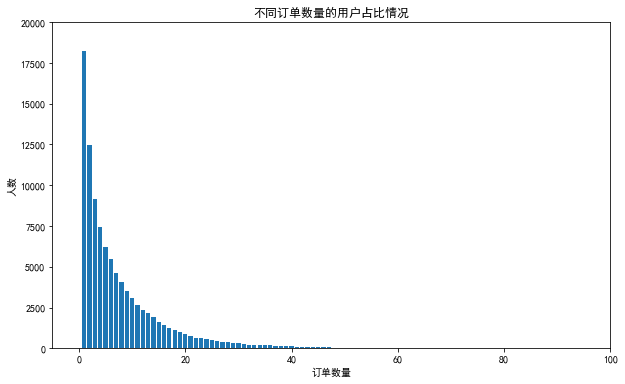

In [50]:
import matplotlib.pyplot as plt
import pylab
pylab.mpl.rcParams['font.sans-serif'] = ['SimHei']
fig, ax = pylab.subplots(figsize=(10, 6))
long_border = (-5,100)
lat_boorder = (0,20000)
plt.xlim(long_border)
plt.ylim(lat_boorder)
plt.bar(o_user_num["o_num"], o_user_num["people_num"])
plt.xlabel("订单数量")
plt.ylabel("人数")
plt.title("不同订单数量的用户占比情况")
plt.show()

In [61]:
user_action.head()

,user_id,sku_id,a_date,a_num,a_type
0,1,80036,2017-04-14,4,1
1,1,96959,2017-01-12,2,1
2,1,8017,2017-03-09,1,1
3,1,80036,2017-04-30,6,1
4,1,16607,2017-01-12,3,1


In [64]:
user_ac = user_action.groupby("user_id")["sku_id"].count().reset_index().rename(columns={"sku_id":"ac_num"}) 

In [65]:
user_ac.head()

,user_id,ac_num
0,1,13
1,2,6
2,3,98
3,4,21
4,5,1


In [70]:
ac_user = user_ac.groupby("ac_num")["user_id"].count().reset_index().rename(columns={"user_id":"people_num"}) 

In [71]:
ac_user.head()

,ac_num,people_num
0,1,2086
1,2,2070
2,3,1990
3,4,1922
4,5,1852


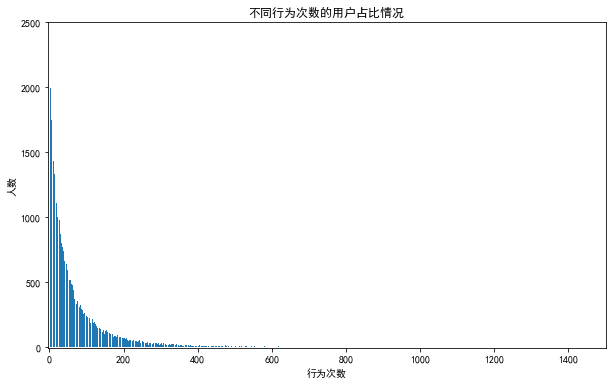

In [78]:
fig, ax = pylab.subplots(figsize=(10, 6))
long_border = (-5,1500)
lat_boorder = (-5,2500)
plt.xlim(long_border)
plt.ylim(lat_boorder)
plt.bar(ac_user["ac_num"], ac_user["people_num"])
plt.xlabel("行为次数")
plt.ylabel("人数")
plt.title("不同行为次数的用户占比情况")
plt.show()

In [37]:
#订单/行为中只出现一次的用户

In [59]:
user_o_one = user_o[user_o["o_num"]==1]
len(user_o_one)

18254

In [53]:
user_action.head()

,user_id,sku_id,a_date,a_num,a_type
0,1,80036,2017-04-14,4,1
1,1,96959,2017-01-12,2,1
2,1,8017,2017-03-09,1,1
3,1,80036,2017-04-30,6,1
4,1,16607,2017-01-12,3,1


In [55]:
user_ac = user_action.groupby("user_id")["sku_id"].count().reset_index().rename(columns={"sku_id":"ac_num"}) 

In [56]:
user_ac_one = user_ac[user_ac["ac_num"]==1]

In [60]:
len(user_ac_one)

2086

In [79]:
#每月订单数统计

In [81]:
user_order.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num
0,1,80036,480066,2017-03-09,14,1
1,1,16607,106933,2017-01-12,14,1
2,1,80036,542604,2017-04-14,14,1
3,1,80036,196335,2017-04-30,14,1
4,1,80036,42502,2017-03-22,14,2


In [82]:
user_or_m = user_order.copy()

In [87]:
user_or_m["month"] = user_or_m["o_date"].apply(lambda x:x.month)

In [90]:
month_o_num = user_or_m.groupby("month")["o_id"].count().reset_index().rename(columns={"o_id":"o_num"}) 

In [91]:
month_o_num.head()

,month,o_num
0,1,69797
1,2,91739
2,3,108373
3,4,114181
4,5,35381


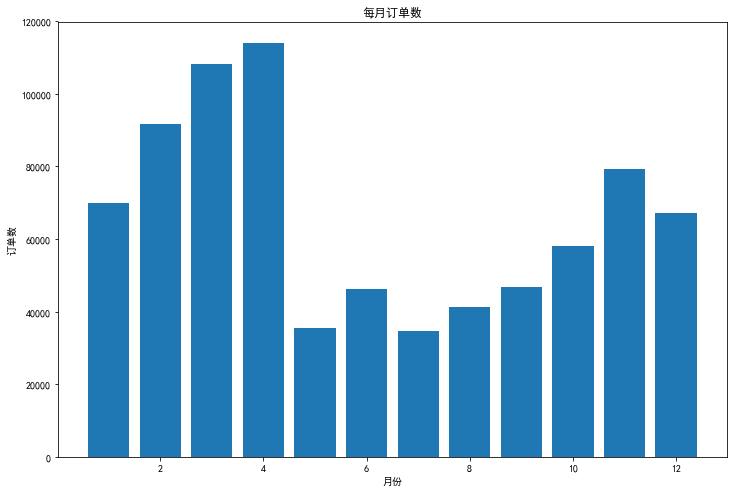

In [97]:
fig, ax = pylab.subplots(figsize=(12, 8))

plt.bar(month_o_num["month"], month_o_num["o_num"])
plt.xlabel("月份")
plt.ylabel("订单数")
plt.title("每月订单数")
plt.show()

In [98]:
#每月用户数

In [100]:
user_or_m.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num,month
0,1,80036,480066,2017-03-09,14,1,3
1,1,16607,106933,2017-01-12,14,1,1
2,1,80036,542604,2017-04-14,14,1,4
3,1,80036,196335,2017-04-30,14,1,4
4,1,80036,42502,2017-03-22,14,2,3


In [102]:
month_user_num = user_or_m.groupby("month")["user_id"].nunique().reset_index().rename(columns={"user_id":"user_num"}) 

In [103]:
month_user_num.head()

,month,user_num
0,1,35211
1,2,51568
2,3,56907
3,4,57658
4,5,17731


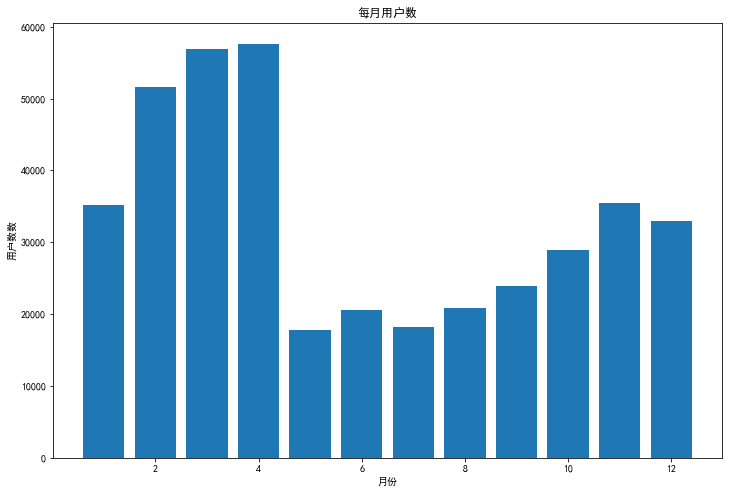

In [104]:
fig, ax = pylab.subplots(figsize=(12, 8))

plt.bar(month_user_num["month"], month_user_num["user_num"])
plt.xlabel("月份")
plt.ylabel("用户数数")
plt.title("每月用户数")
plt.show()

In [105]:
#每天订单数统计

In [106]:
user_order_day = user_order.copy()

In [107]:
user_order_day.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num
0,1,80036,480066,2017-03-09,14,1
1,1,16607,106933,2017-01-12,14,1
2,1,80036,542604,2017-04-14,14,1
3,1,80036,196335,2017-04-30,14,1
4,1,80036,42502,2017-03-22,14,2


In [110]:
day_order_num = user_order_day.groupby("o_date")["o_id"].count().reset_index().rename(columns={"o_id":"day_o_num"}) 

In [111]:
day_order_num.head()

,o_date,day_o_num
0,2016-05-01,1022
1,2016-05-02,1096
2,2016-05-03,1098
3,2016-05-04,978
4,2016-05-05,1114


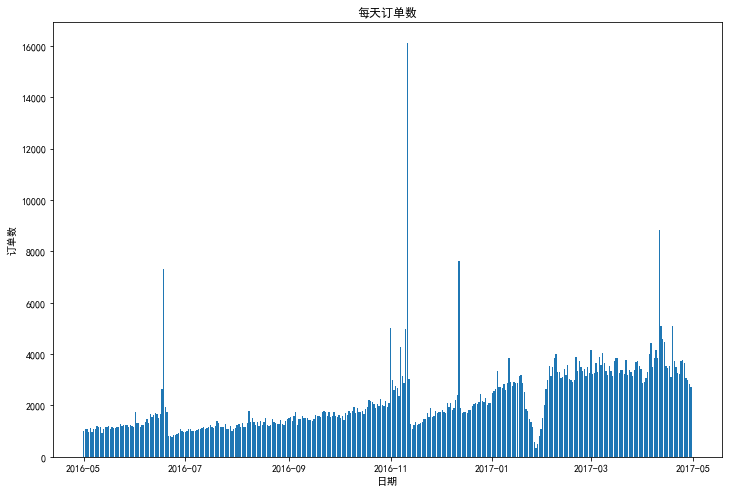

In [112]:
fig, ax = pylab.subplots(figsize=(12, 8))

plt.bar(day_order_num["o_date"], day_order_num["day_o_num"])
plt.xlabel("日期")
plt.ylabel("订单数")
plt.title("每天订单数")
plt.show()

In [113]:
#每天用户数统计

In [114]:
user_order_day.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num
0,1,80036,480066,2017-03-09,14,1
1,1,16607,106933,2017-01-12,14,1
2,1,80036,542604,2017-04-14,14,1
3,1,80036,196335,2017-04-30,14,1
4,1,80036,42502,2017-03-22,14,2


In [115]:
day_user_num = user_order_day.groupby("o_date")["user_id"].nunique().reset_index().rename(columns={"user_id":"day_u_num"}) 

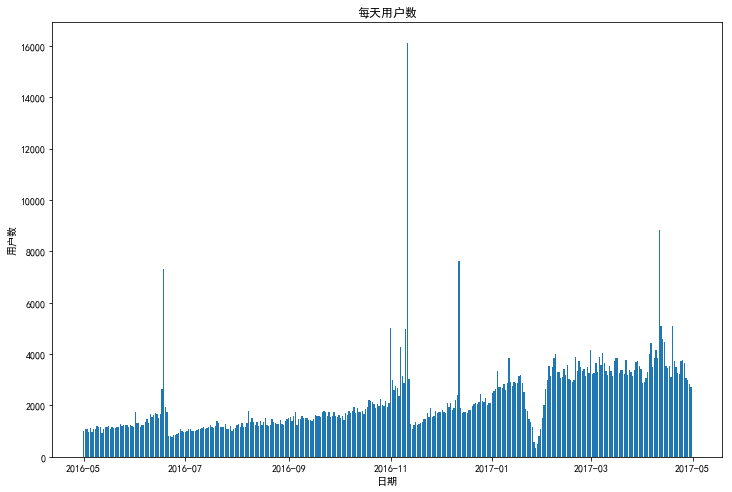

In [116]:
fig, ax = pylab.subplots(figsize=(12, 8))

plt.bar(day_order_num["o_date"], day_order_num["day_o_num"])
plt.xlabel("日期")
plt.ylabel("用户数")
plt.title("每天用户数")
plt.show()

In [ ]:
#购买间隔天数与购买人数分析

In [118]:
inter_day_order = user_order.copy()

In [119]:
inter_day_order.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num
0,1,80036,480066,2017-03-09,14,1
1,1,16607,106933,2017-01-12,14,1
2,1,80036,542604,2017-04-14,14,1
3,1,80036,196335,2017-04-30,14,1
4,1,80036,42502,2017-03-22,14,2


In [127]:
inter_day_order = inter_day_order.sort_values(['user_id', 'o_date'], ascending=[1, 1])
rnColumn = inter_day_order.groupby("user_id").rank(method='min')
inter_day_order["rn"] = rnColumn["o_date"]
inter_day_order['rn_1'] = rnColumn['o_date'] - 1
inter_day_order2 = inter_day_order.merge(inter_day_order, how='left', left_on=['user_id', 'rn_1'], right_on=['user_id', 'rn'])

In [128]:
inter_day_order.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num,rn,rn_1
1,1,16607,106933,2017-01-12,14,1,1.0,0.0
5,1,16607,235938,2017-02-12,14,1,2.0,1.0
0,1,80036,480066,2017-03-09,14,1,3.0,2.0
4,1,80036,42502,2017-03-22,14,2,4.0,3.0
2,1,80036,542604,2017-04-14,14,1,5.0,4.0


In [129]:
rnColumn.head()

,sku_id,o_id,o_date,o_area,o_sku_num,rn
1,1.0,2.0,1.0,1.0,1.0,1.0
5,1.0,4.0,2.0,1.0,1.0,2.0
0,3.0,5.0,3.0,1.0,1.0,3.0
4,3.0,1.0,4.0,1.0,6.0,4.0
2,3.0,6.0,5.0,1.0,1.0,5.0


In [130]:
inter_day_order2.head()

,user_id,sku_id_x,o_id_x,o_date_x,o_area_x,o_sku_num_x,rn_x,rn_1_x,sku_id_y,o_id_y,o_date_y,o_area_y,o_sku_num_y,rn_y,rn_1_y
0,1,16607,106933,2017-01-12,14,1,1.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,1,16607,235938,2017-02-12,14,1,2.0,1.0,16607.0,106933.0,2017-01-12,14.0,1.0,1.0,0.0
2,1,80036,480066,2017-03-09,14,1,3.0,2.0,16607.0,235938.0,2017-02-12,14.0,1.0,2.0,1.0
3,1,80036,42502,2017-03-22,14,2,4.0,3.0,80036.0,480066.0,2017-03-09,14.0,1.0,3.0,2.0
4,1,80036,542604,2017-04-14,14,1,5.0,4.0,80036.0,42502.0,2017-03-22,14.0,2.0,4.0,3.0


In [139]:
inter_day_order3 = inter_day_order2[["user_id", "o_date_x", "o_date_y"]]

In [151]:
td=pd.to_datetime(inter_day_order3["o_date_x"][1],format='%Y%m%d')-pd.to_datetime(inter_day_order3["o_date_y"][1], format='%Y%m%d')

In [159]:
td

Timedelta('31 days 00:00:00')

In [150]:
inter_day_order3["o_date_x"][1] - inter_day_order3["o_date_y"][1]

Timedelta('31 days 00:00:00')

In [132]:

def get_diff(row):
    
    row["o_date_x"] 
inter_day_order3["diff_data"] = inter_day_order3.apply()

,user_id,o_date_x,o_date_y
0,1,2017-01-12,NaT
1,1,2017-02-12,2017-01-12
2,1,2017-03-09,2017-02-12
3,1,2017-03-22,2017-03-09
4,1,2017-04-14,2017-03-22
5,1,2017-04-30,2017-04-14
6,2,2017-04-24,NaT
7,3,2016-05-20,NaT
8,3,2016-06-18,2016-05-20
9,3,2016-07-25,2016-06-18
